# 1. Import modules

In [48]:
import os
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi



In [49]:
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')

# 2. Load data 

Data below can be onverted from original ATAC SNAP files using the notebook:

[1_convert_snap_to_anndata](1_convert_snap_to_anndata.ipynb)

In [50]:
data_path = r'L:\Shiwei\DNA_MERFISH_analysis\Analysis_MOp_methylation_ATAC\data\EckerRen_Mouse_MOp_methylation_ATAC'

In [51]:
adata = ad.read(os.path.join(data_path, 'MOp_ATAC_combined.snap.h5ad'))

In [52]:
adata

AnnData object with n_obs × n_vars = 135665 × 485929
    obs: 'barcode', 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample'
    var: 'name'

In [53]:
print(adata.obs_names)
print(adata.obs_names)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '135656', '135657', '135658', '135659', '135660', '135661', '135662',
       '135663', '135664', '135665'],
      dtype='object', length=135665)
Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '135656', '135657', '135658', '135659', '135660', '135661', '135662',
       '135663', '135664', '135665'],
      dtype='object', length=135665)


## 2.1 Re-format the adata.var index to allow using epiScanpy

In [54]:
var_index_list = [_loci.replace(":", "_") for _loci in adata.var['name'].tolist()]
var_index_list = [_loci.replace("-", "_") for _loci in var_index_list]
var_index_list

['chrY_135001_140000',
 'chrY_140001_145000',
 'chrY_145001_150000',
 'chrY_170001_175000',
 'chrY_180001_185000',
 'chrY_190001_195000',
 'chrY_195001_200000',
 'chrY_200001_205000',
 'chrY_205001_210000',
 'chrY_210001_215000',
 'chrY_225001_230000',
 'chrY_235001_240000',
 'chrY_255001_260000',
 'chrY_260001_265000',
 'chrY_265001_270000',
 'chrY_270001_275000',
 'chrY_275001_280000',
 'chrY_280001_285000',
 'chrY_285001_290000',
 'chrY_290001_295000',
 'chrY_295001_300000',
 'chrY_300001_305000',
 'chrY_305001_310000',
 'chrY_315001_320000',
 'chrY_320001_325000',
 'chrY_325001_330000',
 'chrY_335001_340000',
 'chrY_340001_345000',
 'chrY_350001_355000',
 'chrY_660001_665000',
 'chrY_665001_670000',
 'chrY_670001_675000',
 'chrY_680001_685000',
 'chrY_690001_695000',
 'chrY_695001_700000',
 'chrY_700001_705000',
 'chrY_705001_710000',
 'chrY_710001_715000',
 'chrY_715001_720000',
 'chrY_720001_725000',
 'chrY_725001_730000',
 'chrY_730001_735000',
 'chrY_735001_740000',
 'chrY_7400

In [55]:
adata.var.index=var_index_list
adata.var

name
chrY_135001_140000              chrY:135001-140000
chrY_140001_145000              chrY:140001-145000
chrY_145001_150000              chrY:145001-150000
chrY_170001_175000              chrY:170001-175000
chrY_180001_185000              chrY:180001-185000
...                                            ...
chr8_129280001_129285000  chr8:129280001-129285000
chr8_129285001_129290000  chr8:129285001-129290000
chr8_129290001_129295000  chr8:129290001-129295000
chr8_129295001_129300000  chr8:129295001-129300000
chr8_129300001_129305000  chr8:129300001-129305000

[485929 rows x 1 columns]

## 2.2 Load other metadata info

In [56]:
anno_path =r'L:\Shiwei\DNA_MERFISH_analysis\Analysis_MOp_methylation_ATAC\data\EckerRen_Mouse_MOp_methylation_ATAC\metadata\atac'
anno_fname = os.path.join(anno_path, 'CEMBA_MOp.barcode.txt')
anno_file = pd.read_csv(anno_fname,sep='\t',index_col=None)


In [57]:
anno_file

sample                           barcode      TN      UM  \
0      CEMBA171206_3C  AGCGATAGAACCAGGTAAGAGATGTATAGCCT  138330  128263   
1      CEMBA171206_3C  AGCGATAGAACCAGGTAATGACGTCAGGACGT  159133  146663   
2      CEMBA171206_3C  AGCGATAGAACCAGGTAGGATAACATAGAGGC   19152   17586   
3      CEMBA171206_3C  AGCGATAGAACCAGGTATAGCCTTAGGCGAAG   14876   13837   
4      CEMBA171206_3C  AGCGATAGAACCAGGTATAGCCTTATAGAGGC   28532   26303   
...               ...                               ...     ...     ...   
81191  CEMBA180618_5D  TCCGGAGATTCCATCCGTACTGACTAAGATCC   11554   10475   
81192  CEMBA180618_5D  TCCGGAGATTCCATCCGTACTGACTTCATCCA    2044    1854   
81193  CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTCGAATTCC    9567    8636   
81194  CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTTAAGATCC    1810    1591   
81195  CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTTTGGAAGT    2637    2353   

           PP     UQ  CM      tsne1      tsne2  cluster  
0      128039  64868   0   7.605117   0.697672        4  
1      146348  69167   0  -9.492925  -6.200938       16  
2       17545   8348   0  14.227358 -11.023748       19  
3       13801   6583   0   5.144768   4.790674        4  
4       26202  12437   0   5.218895  -8.674734        9  
...       ...    ...  ..        ...        ...      ...  
81191   10431   8413   0 -31.803957  -2.506705       12  
81192    1851   1437   0  -6.867229  28.553077        6  
81193    8604   6709   0   5.533320   6.234067        4  
81194    1582   1262   0 -17.128061  13.283708        1  
81195    2346   1822   0  28.906304  -0.482058        7  

[81196 rows x 10 columns]

In [58]:
cluster_annotation_path=r'L:\Shiwei\DNA_MERFISH_analysis\Analysis_MOp_methylation_ATAC\data\EckerRen_Mouse_MOp_methylation_ATAC\study\ATAC'
cluster_annotation = pd.read_csv(os.path.join(cluster_annotation_path,'cluster_annotation.txt'), 
                                 sep='\t', index_col=0, squeeze=True)

cluster_annotation_dict= cluster_annotation.to_dict()
cluster_annotation_dict

{1: 'OGC',
 2: 'CGE',
 3: 'Smc',
 4: 'L6.CT',
 5: 'L4',
 6: 'OPC',
 7: 'MGC',
 8: 'L23.c',
 9: 'L5.IT.b',
 10: 'Other',
 11: 'NP',
 12: 'L23.a',
 13: 'Other',
 14: 'L5.IT.a',
 15: 'Endo',
 16: 'L23.b',
 17: 'Sst',
 18: 'Pv',
 19: 'ASC',
 20: 'L5.PT',
 21: 'L6.IT'}

In [59]:
cluster_number_list = anno_file['cluster'].to_list()

cluster_name_list=[]
for _num in cluster_number_list:
    _name = cluster_annotation_dict[_num]
    cluster_name_list.append(_name)
    
    
cluster_name_series = pd.Series(cluster_name_list)
cluster_name_series

0          L6.CT
1          L23.b
2            ASC
3          L6.CT
4        L5.IT.b
          ...   
81191      L23.a
81192        OPC
81193      L6.CT
81194        OGC
81195        MGC
Length: 81196, dtype: object

In [60]:
meta_path =r'L:\Shiwei\DNA_MERFISH_analysis\Analysis_MOp_methylation_ATAC\data\EckerRen_Mouse_MOp_methylation_ATAC\study\ATAC'
meta_fname = os.path.join(meta_path, 'CEMBA_MOp.L2.cluster.meta.txt')
meta_file = pd.read_csv(meta_fname,sep='\t',index_col=None)

meta_file

x.sp.joint@sample                           barcode      TN      UM  \
0        CEMBA171206_3C  AGCGATAGAACCAGGTAAGAGATGTATAGCCT  138330  128263   
1        CEMBA171206_3C  AGCGATAGAACCAGGTAATGACGTCAGGACGT  159133  146663   
2        CEMBA171206_3C  AGCGATAGAACCAGGTAGGATAACATAGAGGC   19152   17586   
3        CEMBA171206_3C  AGCGATAGAACCAGGTATAGCCTTAGGCGAAG   14876   13837   
4        CEMBA171206_3C  AGCGATAGAACCAGGTATAGCCTTATAGAGGC   28532   26303   
...                 ...                               ...     ...     ...   
81191    CEMBA180618_5D  TCCGGAGATTCCATCCGTACTGACTAAGATCC   11554   10475   
81192    CEMBA180618_5D  TCCGGAGATTCCATCCGTACTGACTTCATCCA    2044    1854   
81193    CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTCGAATTCC    9567    8636   
81194    CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTTAAGATCC    1810    1591   
81195    CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTTTGGAAGT    2637    2353   

           PP     UQ  CM x.sp.joint@cluster      tsne1      tsne2     umap-1  \
0      128039  64868   0              L6.CT   7.605117   0.697672  -2.125204   
1      146348  69167   0              L23.b  -9.492925  -6.200938   8.959074   
2       17545   8348   0                ASC  14.227358 -11.023748  -6.880754   
3       13801   6583   0              L6.CT   5.144768   4.790674  -0.955707   
4       26202  12437   0            L5.IT.b   5.218895  -8.674734   0.796851   
...       ...    ...  ..                ...        ...        ...        ...   
81191   10431   8413   0              L23.a -31.803957  -2.506705   7.885219   
81192    1851   1437   0                OPC  -6.867229  28.553077  -7.167595   
81193    8604   6709   0              L6.CT   5.533320   6.234067  -0.671655   
81194    1582   1262   0                OGC -17.128061  13.283708 -12.842385   
81195    2346   1822   0                MGC  28.906304  -0.482058  -2.681218   

          umap-2  
0      -4.396653  
1       3.006819  
2      -2.903271  
3      -4.635163  
4       4.447933  
...          ...  
81191   1.371855  
81192  -8.232744  
81193  -4.617296  
81194  -0.131198  
81195  15.040867  

[81196 rows x 12 columns]

In [61]:
meta_file['cluster_number']=anno_file['cluster']
meta_file

x.sp.joint@sample                           barcode      TN      UM  \
0        CEMBA171206_3C  AGCGATAGAACCAGGTAAGAGATGTATAGCCT  138330  128263   
1        CEMBA171206_3C  AGCGATAGAACCAGGTAATGACGTCAGGACGT  159133  146663   
2        CEMBA171206_3C  AGCGATAGAACCAGGTAGGATAACATAGAGGC   19152   17586   
3        CEMBA171206_3C  AGCGATAGAACCAGGTATAGCCTTAGGCGAAG   14876   13837   
4        CEMBA171206_3C  AGCGATAGAACCAGGTATAGCCTTATAGAGGC   28532   26303   
...                 ...                               ...     ...     ...   
81191    CEMBA180618_5D  TCCGGAGATTCCATCCGTACTGACTAAGATCC   11554   10475   
81192    CEMBA180618_5D  TCCGGAGATTCCATCCGTACTGACTTCATCCA    2044    1854   
81193    CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTCGAATTCC    9567    8636   
81194    CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTTAAGATCC    1810    1591   
81195    CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTTTGGAAGT    2637    2353   

           PP     UQ  CM x.sp.joint@cluster      tsne1      tsne2     umap-1  \
0      128039  64868   0              L6.CT   7.605117   0.697672  -2.125204   
1      146348  69167   0              L23.b  -9.492925  -6.200938   8.959074   
2       17545   8348   0                ASC  14.227358 -11.023748  -6.880754   
3       13801   6583   0              L6.CT   5.144768   4.790674  -0.955707   
4       26202  12437   0            L5.IT.b   5.218895  -8.674734   0.796851   
...       ...    ...  ..                ...        ...        ...        ...   
81191   10431   8413   0              L23.a -31.803957  -2.506705   7.885219   
81192    1851   1437   0                OPC  -6.867229  28.553077  -7.167595   
81193    8604   6709   0              L6.CT   5.533320   6.234067  -0.671655   
81194    1582   1262   0                OGC -17.128061  13.283708 -12.842385   
81195    2346   1822   0                MGC  28.906304  -0.482058  -2.681218   

          umap-2  cluster_number  
0      -4.396653               4  
1       3.006819              16  
2      -2.903271              19  
3      -4.635163               4  
4       4.447933               9  
...          ...             ...  
81191   1.371855              12  
81192  -8.232744               6  
81193  -4.617296               4  
81194  -0.131198               1  
81195  15.040867               7  

[81196 rows x 13 columns]

In [62]:
meta_file['cluster']=cluster_name_series
meta_file

x.sp.joint@sample                           barcode      TN      UM  \
0        CEMBA171206_3C  AGCGATAGAACCAGGTAAGAGATGTATAGCCT  138330  128263   
1        CEMBA171206_3C  AGCGATAGAACCAGGTAATGACGTCAGGACGT  159133  146663   
2        CEMBA171206_3C  AGCGATAGAACCAGGTAGGATAACATAGAGGC   19152   17586   
3        CEMBA171206_3C  AGCGATAGAACCAGGTATAGCCTTAGGCGAAG   14876   13837   
4        CEMBA171206_3C  AGCGATAGAACCAGGTATAGCCTTATAGAGGC   28532   26303   
...                 ...                               ...     ...     ...   
81191    CEMBA180618_5D  TCCGGAGATTCCATCCGTACTGACTAAGATCC   11554   10475   
81192    CEMBA180618_5D  TCCGGAGATTCCATCCGTACTGACTTCATCCA    2044    1854   
81193    CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTCGAATTCC    9567    8636   
81194    CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTTAAGATCC    1810    1591   
81195    CEMBA180618_5D  TCCGGAGATTCCATCCTATAGCCTTTGGAAGT    2637    2353   

           PP     UQ  CM x.sp.joint@cluster      tsne1      tsne2     umap-1  \
0      128039  64868   0              L6.CT   7.605117   0.697672  -2.125204   
1      146348  69167   0              L23.b  -9.492925  -6.200938   8.959074   
2       17545   8348   0                ASC  14.227358 -11.023748  -6.880754   
3       13801   6583   0              L6.CT   5.144768   4.790674  -0.955707   
4       26202  12437   0            L5.IT.b   5.218895  -8.674734   0.796851   
...       ...    ...  ..                ...        ...        ...        ...   
81191   10431   8413   0              L23.a -31.803957  -2.506705   7.885219   
81192    1851   1437   0                OPC  -6.867229  28.553077  -7.167595   
81193    8604   6709   0              L6.CT   5.533320   6.234067  -0.671655   
81194    1582   1262   0                OGC -17.128061  13.283708 -12.842385   
81195    2346   1822   0                MGC  28.906304  -0.482058  -2.681218   

          umap-2  cluster_number  cluster  
0      -4.396653               4    L6.CT  
1       3.006819              16    L23.b  
2      -2.903271              19      ASC  
3      -4.635163               4    L6.CT  
4       4.447933               9  L5.IT.b  
...          ...             ...      ...  
81191   1.371855              12    L23.a  
81192  -8.232744               6      OPC  
81193  -4.617296               4    L6.CT  
81194  -0.131198               1      OGC  
81195  15.040867               7      MGC  

[81196 rows x 14 columns]

In [63]:
barcode_cluster_df = meta_file['cluster']
barcode_cluster_df.index = meta_file['barcode']

In [64]:
barcode_cluster_df

barcode
AGCGATAGAACCAGGTAAGAGATGTATAGCCT      L6.CT
AGCGATAGAACCAGGTAATGACGTCAGGACGT      L23.b
AGCGATAGAACCAGGTAGGATAACATAGAGGC        ASC
AGCGATAGAACCAGGTATAGCCTTAGGCGAAG      L6.CT
AGCGATAGAACCAGGTATAGCCTTATAGAGGC    L5.IT.b
                                     ...   
TCCGGAGATTCCATCCGTACTGACTAAGATCC      L23.a
TCCGGAGATTCCATCCGTACTGACTTCATCCA        OPC
TCCGGAGATTCCATCCTATAGCCTCGAATTCC      L6.CT
TCCGGAGATTCCATCCTATAGCCTTAAGATCC        OGC
TCCGGAGATTCCATCCTATAGCCTTTGGAAGT        MGC
Name: cluster, Length: 81196, dtype: object

In [65]:
cluster_barcode_dict= barcode_cluster_df.to_dict()
cluster_barcode_dict

{'AGCGATAGAACCAGGTAAGAGATGTATAGCCT': 'ASC',
 'AGCGATAGAACCAGGTAATGACGTCAGGACGT': 'L23.b',
 'AGCGATAGAACCAGGTAGGATAACATAGAGGC': 'L5.IT.b',
 'AGCGATAGAACCAGGTATAGCCTTAGGCGAAG': 'L6.CT',
 'AGCGATAGAACCAGGTATAGCCTTATAGAGGC': 'L6.IT',
 'AGCGATAGAACCAGGTATAGCCTTGTACTGAC': 'L5.IT.b',
 'AGCGATAGAACCAGGTATTCGTTGTAATCTTA': 'L23.a',
 'AGCGATAGAACCAGGTATTCGTTGTATAGCCT': 'L6.IT',
 'AGCGATAGAACCAGGTGAAGTATGAGGCGAAG': 'L5.IT.a',
 'AGCGATAGAACCAGGTGAAGTATGTATAGCCT': 'Other',
 'AGCGATAGAACCAGGTGGATACTACAGGACGT': 'OGC',
 'AGCGATAGAACCAGGTTAAGATCCATAGAGGC': 'MGC',
 'AGCGATAGAACCAGGTTAAGATCCGGCTCTGA': 'Sst',
 'AGCGATAGAACCAGGTTTACGACCCCTATCCT': 'OGC',
 'AGCGATAGAACCAGGTTTCATCCATAATCTTA': 'L6.CT',
 'AGCGATAGAAGAGGCAAAGGAGTAAGGCGAAG': 'L23.a',
 'AGCGATAGAAGAGGCAAAGGCTATATAGAGGC': 'OGC',
 'AGCGATAGAAGAGGCAAAGGCTATCCTATCCT': 'L6.CT',
 'AGCGATAGAAGAGGCAACTGCATAAGGCGAAG': 'L4',
 'AGCGATAGAAGAGGCAATCTGAGTATAGAGGC': 'Sst',
 'AGCGATAGAAGAGGCACGTCTAATCCTATCCT': 'L23.b',
 'AGCGATAGAAGAGGCAGAGCCTTACAGGACGT': 'OPC',
 

## 2.3 Add transcript annotation

In [66]:
# add transcript annotation
ref_filename = os.path.join(data_path, 'gencode.vM1.annotation.gtf')
ref_filename 

'L:\\Shiwei\\DNA_MERFISH_analysis\\Analysis_MOp_methylation_ATAC\\data\\EckerRen_Mouse_MOp_methylation_ATAC\\gencode.vM1.annotation.gtf'

In [67]:
epi.tl.find_genes(adata,
           gtf_file=ref_filename,
           key_added='transcript_annotation',
           upstream=5000,
           feature_type='transcript',
           annotation='HAVANA',
           raw=False)

In [68]:
adata

AnnData object with n_obs × n_vars = 135665 × 485929
    obs: 'barcode', 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample'
    var: 'name', 'transcript_annotation'

In [69]:
np.unique(adata.var['transcript_annotation'])

array(['', '0610007C21Rik;Cad;Slc5a6', '0610007C21Rik;Slc5a6', ...,
       'Zzz3', 'intergenic', 'l7Rn6'], dtype=object)

# 3. Preprocessing

In [70]:
# check if dta matix is binary
print(np.max(adata.X))

adata.X

1.0


<135665x485929 sparse matrix of type '<class 'numpy.float32'>'
	with 300054453 stored elements in Compressed Sparse Column format>

In [71]:
# remove any potential empty features or barcodes  (peak only in one cell or cell that only one peak)
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)

In [72]:
# 
adata

AnnData object with n_obs × n_vars = 135664 × 485929
    obs: 'barcode', 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'nb_features'
    var: 'name', 'transcript_annotation', 'n_cells'

In [73]:
adata.obs

barcode        TN        UM        PP  \
1       AGCGATAGAACCAGGTAAGAGATGATAGAGGC     231.0     141.0     139.0   
2       AGCGATAGAACCAGGTAAGAGATGTATAGCCT  138330.0  128263.0  128039.0   
3       AGCGATAGAACCAGGTAATGACGTCAGGACGT  159133.0  146663.0  146348.0   
4       AGCGATAGAACCAGGTAGGATAACATAGAGGC   19152.0   17586.0   17545.0   
5       AGCGATAGAACCAGGTATAGCCTTAGGCGAAG   14876.0   13837.0   13801.0   
...                                  ...       ...       ...       ...   
135661  TCCGGAGATTCCATCCGTACTGACTAAGATCC   11554.0   10475.0   10431.0   
135662  TCCGGAGATTCCATCCGTACTGACTTCATCCA    2044.0    1854.0    1851.0   
135663  TCCGGAGATTCCATCCTATAGCCTCGAATTCC    9567.0    8636.0    8604.0   
135664  TCCGGAGATTCCATCCTATAGCCTTAAGATCC    1810.0    1591.0    1582.0   
135665  TCCGGAGATTCCATCCTATAGCCTTTGGAAGT    2637.0    2353.0    2346.0   

             UQ   CM                                               file  \
1          64.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
2       64868.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
3       69167.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
4        8348.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
5        6583.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
...         ...  ...                                                ...   
135661   8413.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
135662   1437.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
135663   6709.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
135664   1262.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
135665   1822.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   

        sample  nb_features  
1       atac_1           11  
2       atac_1        30826  
3       atac_1        30996  
4       atac_1         4070  
5       atac_1         3590  
...        ...          ...  
135661  atac_9         4448  
135662  atac_9          896  
135663  atac_9         3707  
135664  atac_9          583  
135665  atac_9         1048  

[135664 rows x 9 columns]

In [74]:
# log10 column
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
adata

AnnData object with n_obs × n_vars = 135664 × 485929
    obs: 'barcode', 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'nb_features', 'log_nb_features'
    var: 'name', 'transcript_annotation', 'n_cells'

... storing 'transcript_annotation' as categorical


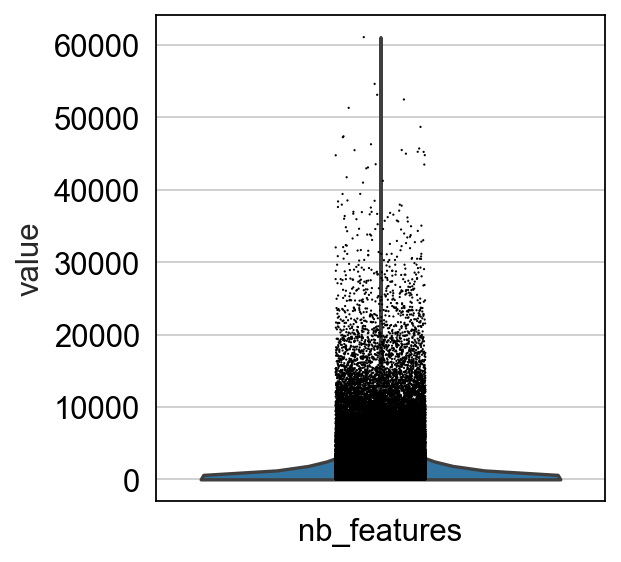

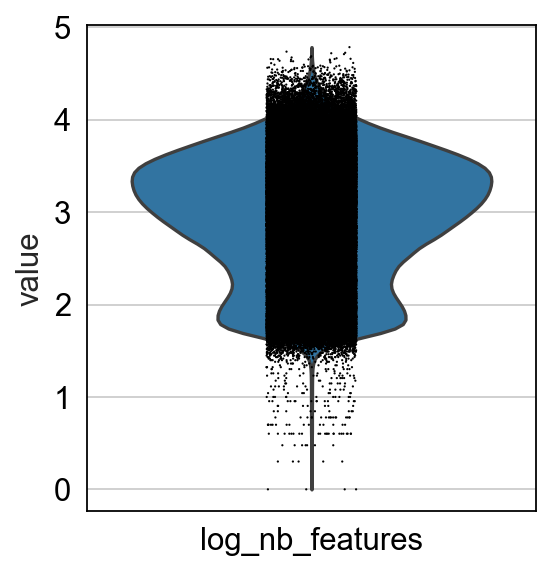

In [75]:
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

In [76]:
analysis_path = os.path.join(data_path, 'episcanpy_analysis')
analysis_path 

'L:\\Shiwei\\DNA_MERFISH_analysis\\Analysis_MOp_methylation_ATAC\\data\\EckerRen_Mouse_MOp_methylation_ATAC\\episcanpy_analysis'

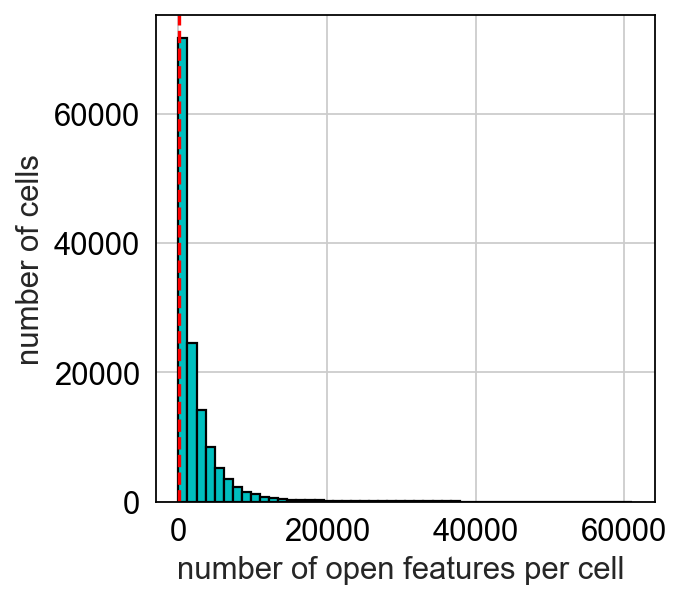

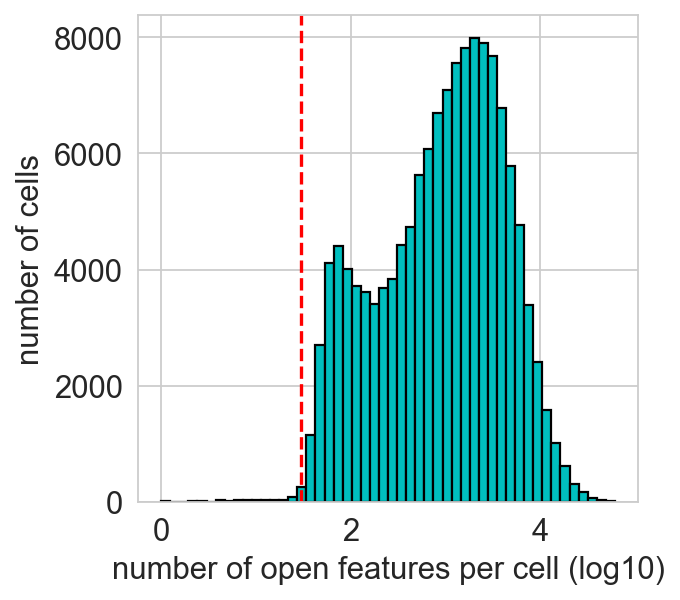

In [77]:
# set a minimum number of cells to keep 
min_features = 30

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features, save=os.path.join(analysis_path ,'MOp_bulk_peaks_coverage_cells.png'))
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features, save=os.path.join(analysis_path ,'MOp_bulk_peaks_coverage_cells_log10.png'))

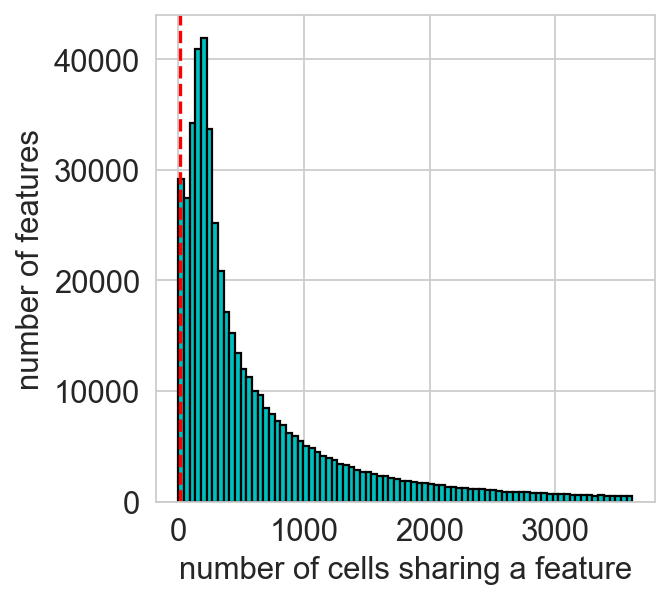

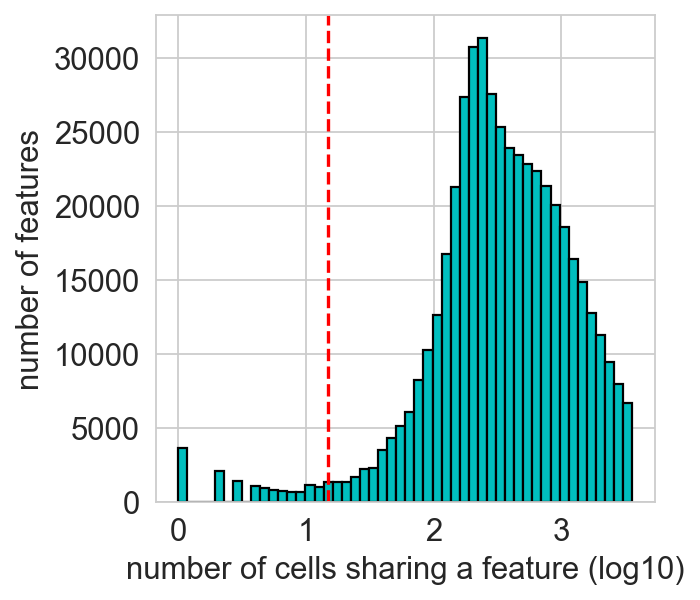

In [78]:
# minimum number of cells sharing a feature
min_cells = 15
epi.pp.coverage_features(adata, binary=True, log=False, 
                        threshold=min_cells, save=os.path.join(analysis_path ,'MOp_bulk_peaks_coverage_peaks.png'))
epi.pp.coverage_features(adata, binary=True, log=True, 
                        threshold=min_cells, save=os.path.join(analysis_path ,'MOp_bulk_peaks_coverage_peaks_log10.png'))

### Actually filter cells

In [84]:
adata.obs['nb_features'].mean()

2216.5100982109207

In [83]:
adata.obs['nb_features'].median()

1095.0

In [85]:
adata

AnnData object with n_obs × n_vars = 135321 × 485929
    obs: 'barcode', 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'nb_features', 'log_nb_features'
    var: 'name', 'transcript_annotation', 'n_cells', 'commonness'

In [82]:
min_features = 30
epi.pp.filter_cells(adata, min_features=min_features)
adata

AnnData object with n_obs × n_vars = 135321 × 485929
    obs: 'barcode', 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'nb_features', 'log_nb_features'
    var: 'name', 'transcript_annotation', 'n_cells', 'commonness'

In [86]:
# keep most features (even they may have low reads) as we will merge them later for chromatin analysis
min_cells = 5
epi.pp.filter_features(adata, min_cells=min_cells)
adata

AnnData object with n_obs × n_vars = 135321 × 477815
    obs: 'barcode', 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'nb_features', 'log_nb_features'
    var: 'name', 'transcript_annotation', 'n_cells', 'commonness'

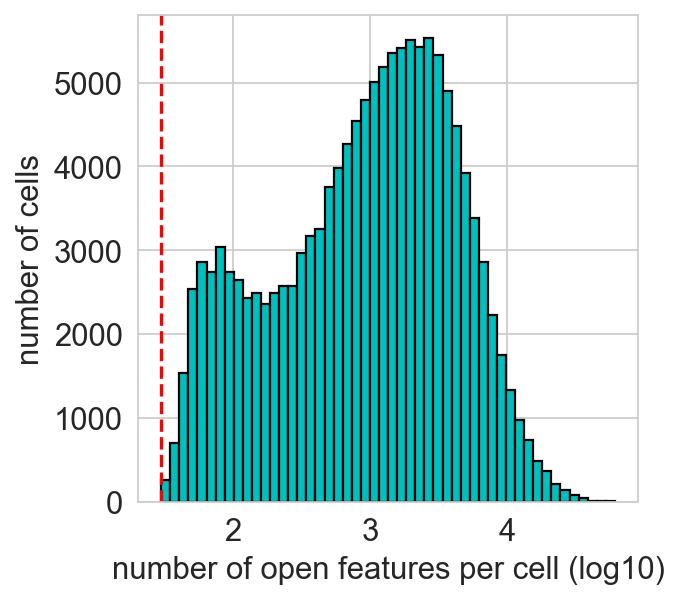

In [87]:
epi.pp.coverage_cells(adata, binary=True, log='log10', bins=50, threshold=min_features)

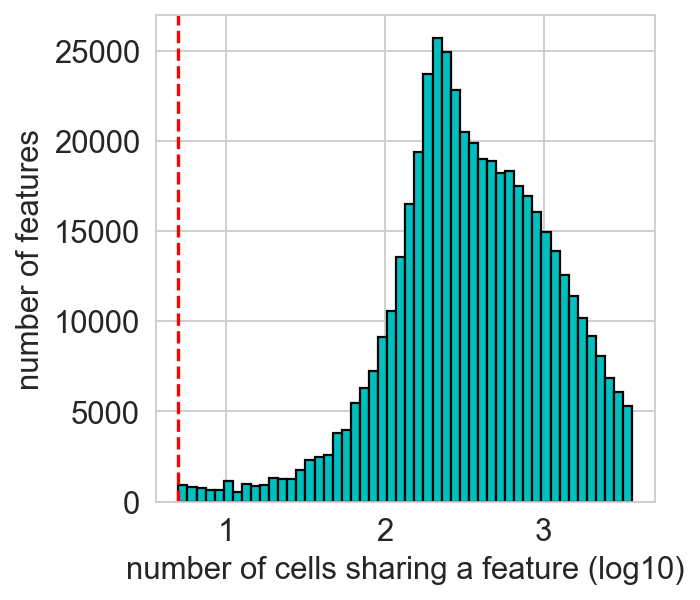

In [88]:
epi.pp.coverage_features(adata, binary=True, log='log10', bins=50, threshold=min_cells)


### Identifying the most variable features

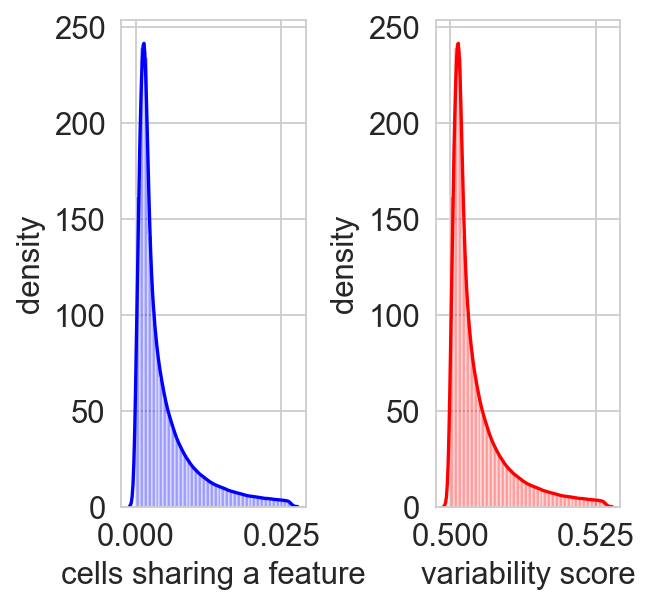

In [89]:
epi.pp.cal_var(adata)

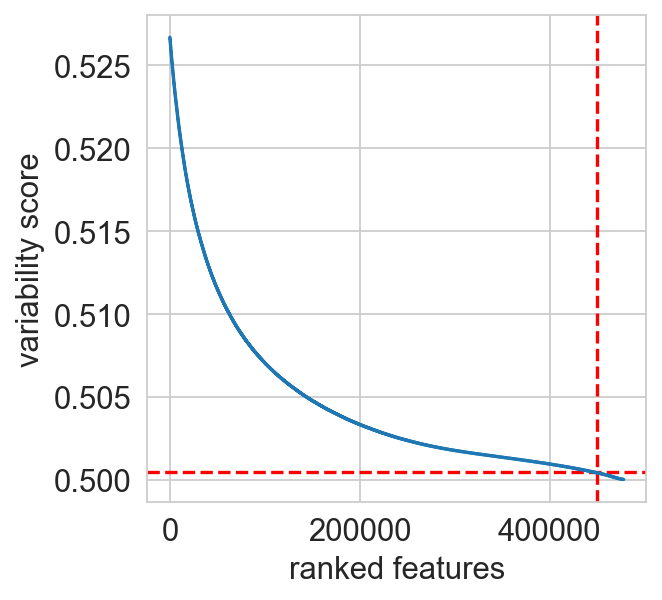

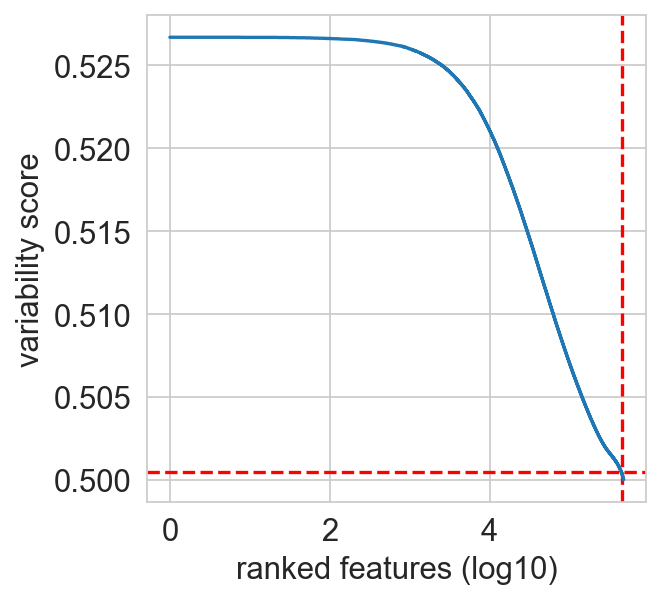

In [94]:
min_score_value = 0.5005
nb_feature_selected = 450000
epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save=os.path.join(analysis_path ,'MOp_variability_features_plot_peakmatrix.png'))

epi.pl.variability_features(adata,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save=os.path.join(analysis_path ,'MOp_variability_features_plot_peakmatrix_log10.png'))

In [95]:
# save the current matrix in the raw layer
adata.raw = adata

In [96]:
adata

AnnData object with n_obs × n_vars = 135321 × 477815
    obs: 'barcode', 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'nb_features', 'log_nb_features'
    var: 'name', 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

In [97]:
# create a new AnnData containing only the most variable features
adata = epi.pp.select_var_feature(adata,
                                  nb_features=nb_feature_selected,
                                  show=False,
                                  copy=True)

In [98]:
adata

View of AnnData object with n_obs × n_vars = 135321 × 450148
    obs: 'barcode', 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'nb_features', 'log_nb_features'
    var: 'name', 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

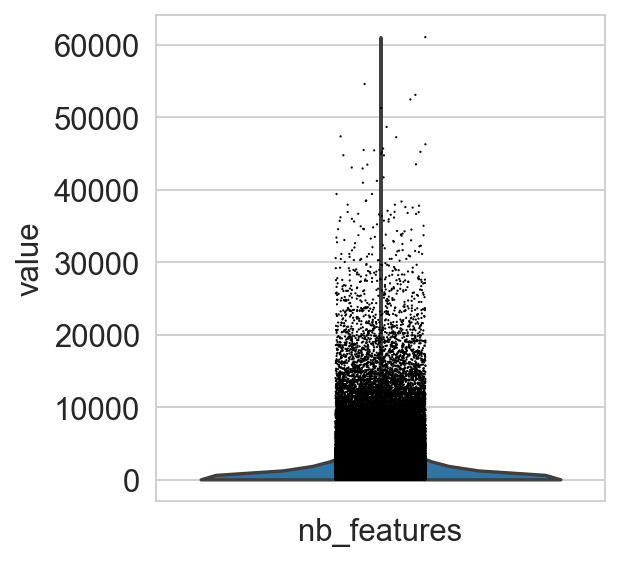

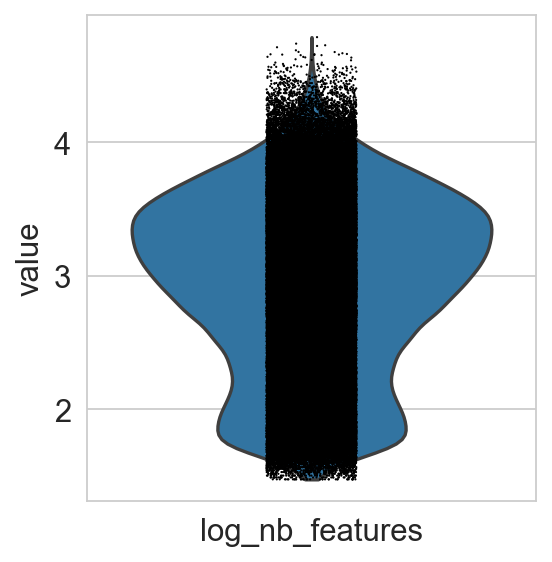

In [99]:
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

In [100]:
epi.pp.filter_cells(adata, min_features=500)
epi.pp.filter_cells(adata, max_features=25000)

Trying to set attribute `.obs` of view, copying.


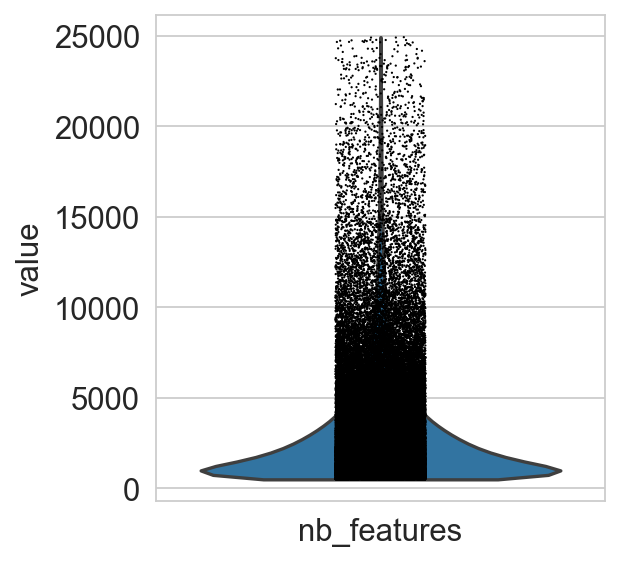

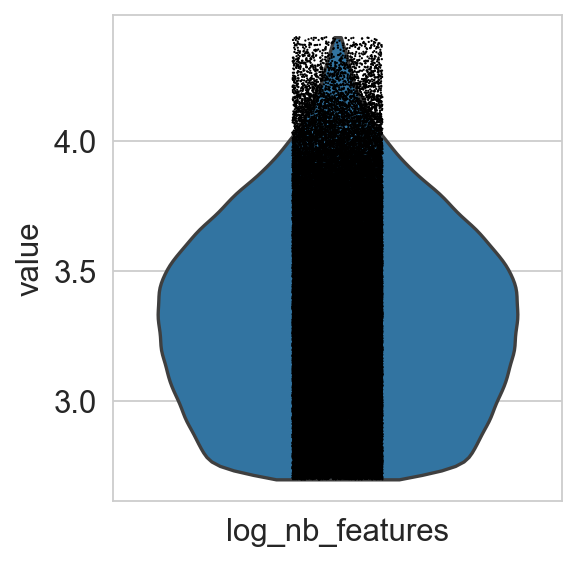

In [101]:
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

# 4. Normalisation, PCA and clustering

### Test effect of normalization on UMAP

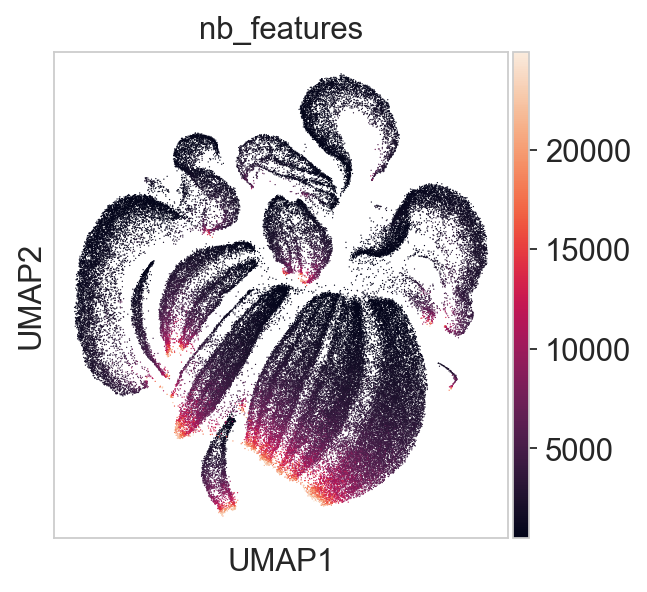

In [102]:
epi.pp.lazy(adata)
sc.pl.umap(adata, color=['nb_features'], wspace=0.3)

In [105]:
adata.obs.head()

barcode       TN       UM       PP       UQ   CM  \
4  AGCGATAGAACCAGGTAGGATAACATAGAGGC  19152.0  17586.0  17545.0   8348.0  0.0   
5  AGCGATAGAACCAGGTATAGCCTTAGGCGAAG  14876.0  13837.0  13801.0   6583.0  0.0   
6  AGCGATAGAACCAGGTATAGCCTTATAGAGGC  28532.0  26303.0  26202.0  12437.0  0.0   
8  AGCGATAGAACCAGGTATAGCCTTGTACTGAC  46202.0  42880.0  42723.0  20345.0  0.0   
9  AGCGATAGAACCAGGTATTCGTTGTAATCTTA   3007.0   2655.0   2645.0   1341.0  0.0   

                                                file  sample  nb_features  \
4  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1         4047   
5  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1         3585   
6  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1         8088   
8  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1        11948   
9  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1          729   

   log_nb_features  
4         3.609594  
5         3.555094  
6         3.908646  
8         4.078094  
9         2.863323

### Add pre-labled cluster info

In [106]:
barcode_list = adata.obs['barcode'].tolist()
barcode_list

['AGCGATAGAACCAGGTAGGATAACATAGAGGC',
 'AGCGATAGAACCAGGTATAGCCTTAGGCGAAG',
 'AGCGATAGAACCAGGTATAGCCTTATAGAGGC',
 'AGCGATAGAACCAGGTATAGCCTTGTACTGAC',
 'AGCGATAGAACCAGGTATTCGTTGTAATCTTA',
 'AGCGATAGAACCAGGTATTCGTTGTATAGCCT',
 'AGCGATAGAACCAGGTGAAGTATGAGGCGAAG',
 'AGCGATAGAACCAGGTGAAGTATGTATAGCCT',
 'AGCGATAGAACCAGGTGGATACTACAGGACGT',
 'AGCGATAGAACCAGGTTAAGATCCATAGAGGC',
 'AGCGATAGAACCAGGTTAAGATCCGGCTCTGA',
 'AGCGATAGAACCAGGTTTACGACCCCTATCCT',
 'AGCGATAGAACCAGGTTTCATCCATAATCTTA',
 'AGCGATAGAAGAGGCAAAGGAGTAAGGCGAAG',
 'AGCGATAGAAGAGGCAAAGGCTATATAGAGGC',
 'AGCGATAGAAGAGGCAAAGGCTATCCTATCCT',
 'AGCGATAGAAGAGGCAACTGCATAAGGCGAAG',
 'AGCGATAGAAGAGGCAATCTGAGTATAGAGGC',
 'AGCGATAGAAGAGGCACGTCTAATCCTATCCT',
 'AGCGATAGAAGAGGCAGAGCCTTACAGGACGT',
 'AGCGATAGAAGAGGCAGTAAGGAGCCTATCCT',
 'AGCGATAGAAGAGGCATCTCTCCGAGGCGAAG',
 'AGCGATAGAAGAGGCATCTCTCCGTATAGCCT',
 'AGCGATAGAAGAGGCATTATGCGACCTATCCT',
 'AGCGATAGAAGCAACGAACGAACGCCTATCCT',
 'AGCGATAGAAGCAACGAAGAGATGCAGGACGT',
 'AGCGATAGAAGCAACGAAGAGATGGTACTGAC',
 

In [107]:
cluster_for_adata_by_barcode = []

for _barcode in barcode_list:
    if _barcode in cluster_barcode_dict.keys():
        cluster_for_adata_by_barcode.append(cluster_barcode_dict[_barcode])
    else:
        cluster_for_adata_by_barcode.append(np.nan)
        
cluster_for_adata_by_barcode        

['L5.IT.b',
 'L6.CT',
 'L6.IT',
 'L5.IT.b',
 'L23.a',
 'L6.IT',
 'L5.IT.a',
 'Other',
 'OGC',
 'MGC',
 'Sst',
 'OGC',
 'L6.CT',
 'L23.a',
 'OGC',
 'L6.CT',
 'L4',
 'Sst',
 'L23.b',
 'OPC',
 'OGC',
 'OGC',
 'L5.PT',
 'OGC',
 'L4',
 'OGC',
 'L23.a',
 'L23.b',
 'Other',
 'L23.b',
 'Pv',
 'L4',
 'MGC',
 'L23.b',
 'ASC',
 nan,
 'L6.IT',
 'L5.PT',
 'L4',
 'L6.CT',
 'Pv',
 'OGC',
 'MGC',
 'MGC',
 'NP',
 'L5.IT.a',
 'MGC',
 'CGE',
 'MGC',
 'MGC',
 'CGE',
 'L6.IT',
 'OPC',
 'L5.IT.a',
 'OGC',
 'Sst',
 'L6.IT',
 'MGC',
 'L23.a',
 'ASC',
 'OGC',
 'OGC',
 'L23.a',
 'L23.c',
 'CGE',
 'L23.c',
 'OGC',
 'L23.a',
 'L23.c',
 'ASC',
 'OPC',
 'OPC',
 'L6.CT',
 nan,
 'OGC',
 'Pv',
 'OPC',
 'L6.IT',
 'L5.IT.b',
 'OGC',
 'L23.c',
 'L4',
 'OGC',
 'L4',
 'MGC',
 'L6.CT',
 'L6.CT',
 'L23.c',
 nan,
 'MGC',
 'L6.CT',
 'OGC',
 'L23.a',
 'L5.IT.a',
 nan,
 'OGC',
 nan,
 'CGE',
 'OGC',
 'Other',
 'L5.IT.b',
 'L23.a',
 'Pv',
 'CGE',
 'L5.IT.b',
 'OGC',
 'L6.CT',
 'L5.IT.a',
 'L5.IT.a',
 'CGE',
 'L23.c',
 'L6.CT',
 'O

In [108]:
cluster_for_adata_by_barcode_df = pd.Series(cluster_for_adata_by_barcode)
cluster_for_adata_by_barcode_df.index= adata.obs.index

In [109]:
adata.obs

barcode       TN       UM       PP       UQ  \
4       AGCGATAGAACCAGGTAGGATAACATAGAGGC  19152.0  17586.0  17545.0   8348.0   
5       AGCGATAGAACCAGGTATAGCCTTAGGCGAAG  14876.0  13837.0  13801.0   6583.0   
6       AGCGATAGAACCAGGTATAGCCTTATAGAGGC  28532.0  26303.0  26202.0  12437.0   
8       AGCGATAGAACCAGGTATAGCCTTGTACTGAC  46202.0  42880.0  42723.0  20345.0   
9       AGCGATAGAACCAGGTATTCGTTGTAATCTTA   3007.0   2655.0   2645.0   1341.0   
...                                  ...      ...      ...      ...      ...   
135661  TCCGGAGATTCCATCCGTACTGACTAAGATCC  11554.0  10475.0  10431.0   8413.0   
135662  TCCGGAGATTCCATCCGTACTGACTTCATCCA   2044.0   1854.0   1851.0   1437.0   
135663  TCCGGAGATTCCATCCTATAGCCTCGAATTCC   9567.0   8636.0   8604.0   6709.0   
135664  TCCGGAGATTCCATCCTATAGCCTTAAGATCC   1810.0   1591.0   1582.0   1262.0   
135665  TCCGGAGATTCCATCCTATAGCCTTTGGAAGT   2637.0   2353.0   2346.0   1822.0   

         CM                                               file  sample  \
4       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
5       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
6       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
8       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
9       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
...     ...                                                ...     ...   
135661  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135662  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135663  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135664  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135665  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   

        nb_features  log_nb_features  
4              4047         3.609594  
5              3585         3.555094  
6              8088         3.908646  
8             11948         4.078094  
9               729         2.863323  
...             ...              ...  
135661         4441         3.648165  
135662          893         2.952308  
135663         3705         3.569023  
135664          583         2.765669  
135665         1042         3.020361  

[89924 rows x 10 columns]

In [110]:
cluster_for_adata_by_barcode_df

4         L5.IT.b
5           L6.CT
6           L6.IT
8         L5.IT.b
9           L23.a
           ...   
135661      L23.a
135662        OPC
135663      L6.CT
135664        OGC
135665        MGC
Length: 89924, dtype: object

In [111]:
adata.obs['cluster']= cluster_for_adata_by_barcode_df

In [112]:
adata.obs

barcode       TN       UM       PP       UQ  \
4       AGCGATAGAACCAGGTAGGATAACATAGAGGC  19152.0  17586.0  17545.0   8348.0   
5       AGCGATAGAACCAGGTATAGCCTTAGGCGAAG  14876.0  13837.0  13801.0   6583.0   
6       AGCGATAGAACCAGGTATAGCCTTATAGAGGC  28532.0  26303.0  26202.0  12437.0   
8       AGCGATAGAACCAGGTATAGCCTTGTACTGAC  46202.0  42880.0  42723.0  20345.0   
9       AGCGATAGAACCAGGTATTCGTTGTAATCTTA   3007.0   2655.0   2645.0   1341.0   
...                                  ...      ...      ...      ...      ...   
135661  TCCGGAGATTCCATCCGTACTGACTAAGATCC  11554.0  10475.0  10431.0   8413.0   
135662  TCCGGAGATTCCATCCGTACTGACTTCATCCA   2044.0   1854.0   1851.0   1437.0   
135663  TCCGGAGATTCCATCCTATAGCCTCGAATTCC   9567.0   8636.0   8604.0   6709.0   
135664  TCCGGAGATTCCATCCTATAGCCTTAAGATCC   1810.0   1591.0   1582.0   1262.0   
135665  TCCGGAGATTCCATCCTATAGCCTTTGGAAGT   2637.0   2353.0   2346.0   1822.0   

         CM                                               file  sample  \
4       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
5       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
6       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
8       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
9       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
...     ...                                                ...     ...   
135661  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135662  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135663  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135664  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135665  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   

        nb_features  log_nb_features  cluster  
4              4047         3.609594  L5.IT.b  
5              3585         3.555094    L6.CT  
6              8088         3.908646    L6.IT  
8             11948         4.078094  L5.IT.b  
9               729         2.863323    L23.a  
...             ...              ...      ...  
135661         4441         3.648165    L23.a  
135662          893         2.952308      OPC  
135663         3705         3.569023    L6.CT  
135664          583         2.765669      OGC  
135665         1042         3.020361      MGC  

[89924 rows x 11 columns]

... storing 'cluster' as categorical


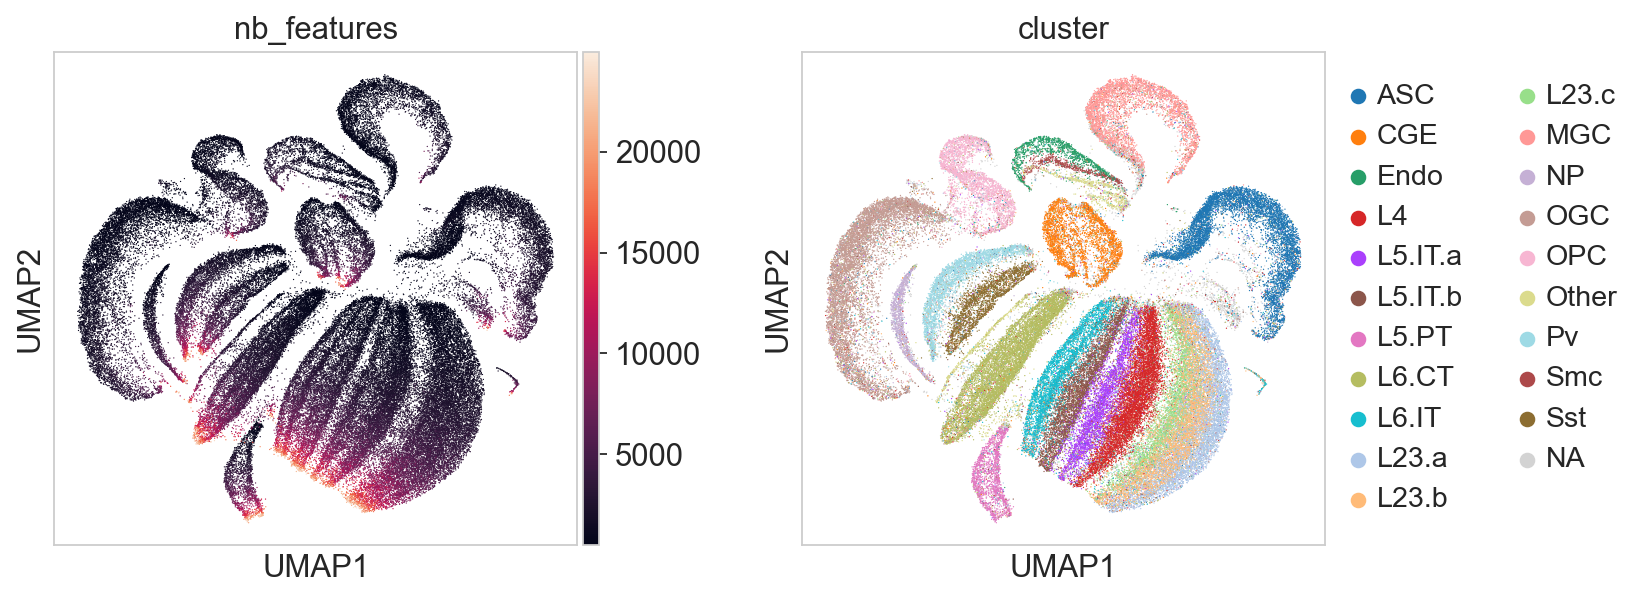

In [113]:
# there is an effect from the total counts
sc.pl.umap(adata, color=['nb_features','cluster'], wspace=0.3)

In [114]:
adata_ori = adata.raw.to_adata()

In [115]:
# cluster info had been added to the raw given the same obs
adata_ori.obs

barcode       TN       UM       PP       UQ  \
4       AGCGATAGAACCAGGTAGGATAACATAGAGGC  19152.0  17586.0  17545.0   8348.0   
5       AGCGATAGAACCAGGTATAGCCTTAGGCGAAG  14876.0  13837.0  13801.0   6583.0   
6       AGCGATAGAACCAGGTATAGCCTTATAGAGGC  28532.0  26303.0  26202.0  12437.0   
8       AGCGATAGAACCAGGTATAGCCTTGTACTGAC  46202.0  42880.0  42723.0  20345.0   
9       AGCGATAGAACCAGGTATTCGTTGTAATCTTA   3007.0   2655.0   2645.0   1341.0   
...                                  ...      ...      ...      ...      ...   
135661  TCCGGAGATTCCATCCGTACTGACTAAGATCC  11554.0  10475.0  10431.0   8413.0   
135662  TCCGGAGATTCCATCCGTACTGACTTCATCCA   2044.0   1854.0   1851.0   1437.0   
135663  TCCGGAGATTCCATCCTATAGCCTCGAATTCC   9567.0   8636.0   8604.0   6709.0   
135664  TCCGGAGATTCCATCCTATAGCCTTAAGATCC   1810.0   1591.0   1582.0   1262.0   
135665  TCCGGAGATTCCATCCTATAGCCTTTGGAAGT   2637.0   2353.0   2346.0   1822.0   

         CM                                               file  sample  \
4       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
5       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
6       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
8       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
9       0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_1   
...     ...                                                ...     ...   
135661  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135662  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135663  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135664  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   
135665  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...  atac_9   

        nb_features  log_nb_features  cluster  
4              4047         3.609594  L5.IT.b  
5              3585         3.555094    L6.CT  
6              8088         3.908646    L6.IT  
8             11948         4.078094  L5.IT.b  
9               729         2.863323    L23.a  
...             ...              ...      ...  
135661         4441         3.648165    L23.a  
135662          893         2.952308      OPC  
135663         3705         3.569023    L6.CT  
135664          583         2.765669      OGC  
135665         1042         3.020361      MGC  

[89924 rows x 11 columns]

In [116]:
# save the current version of the matrix (binary, not normalised) in a layer of the Anndata.
adata.layers['binary'] = adata.X.copy()

In [117]:
# library size correction
# default is to median
epi.pp.normalize_total(adata)

In [118]:
# save the current version of the matrix (normalised) in a layer of the Anndata.
adata.layers['normalized'] = adata.X.copy()

In [119]:
adata.layers['normalized']

<89924x450148 sparse matrix of type '<class 'numpy.float32'>'
	with 282442755 stored elements in Compressed Sparse Column format>

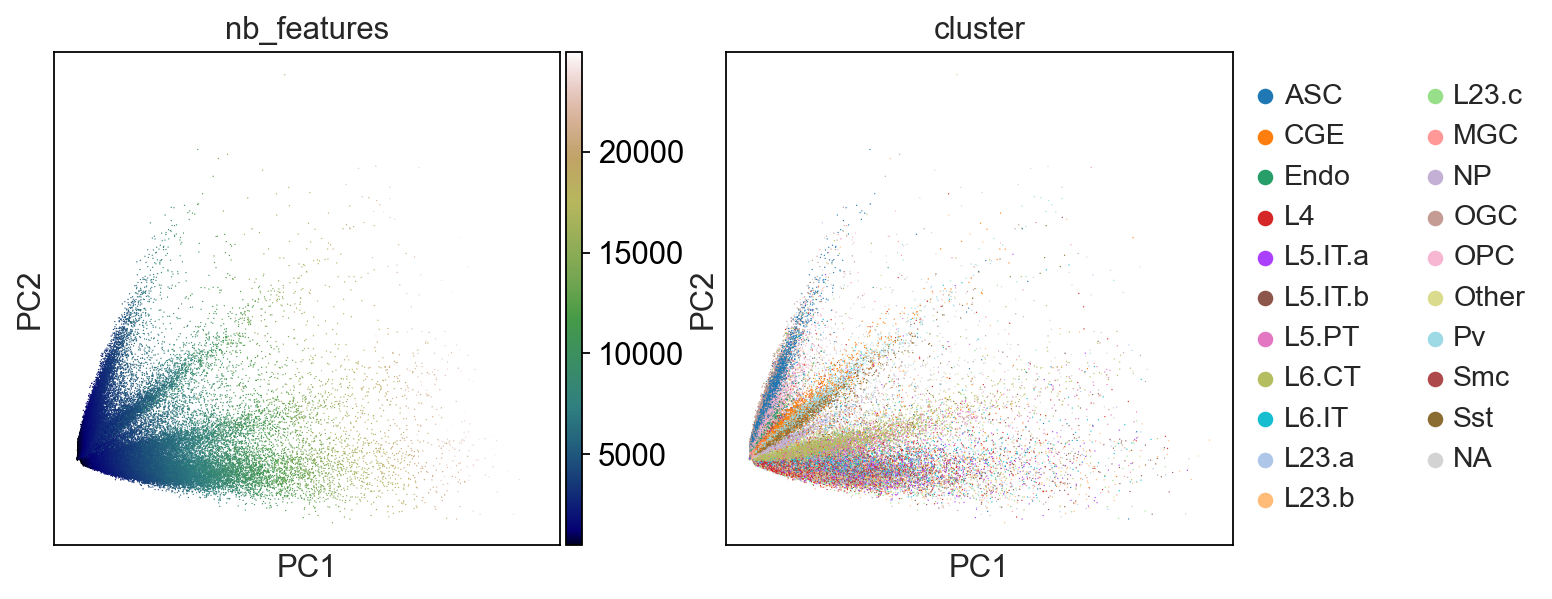

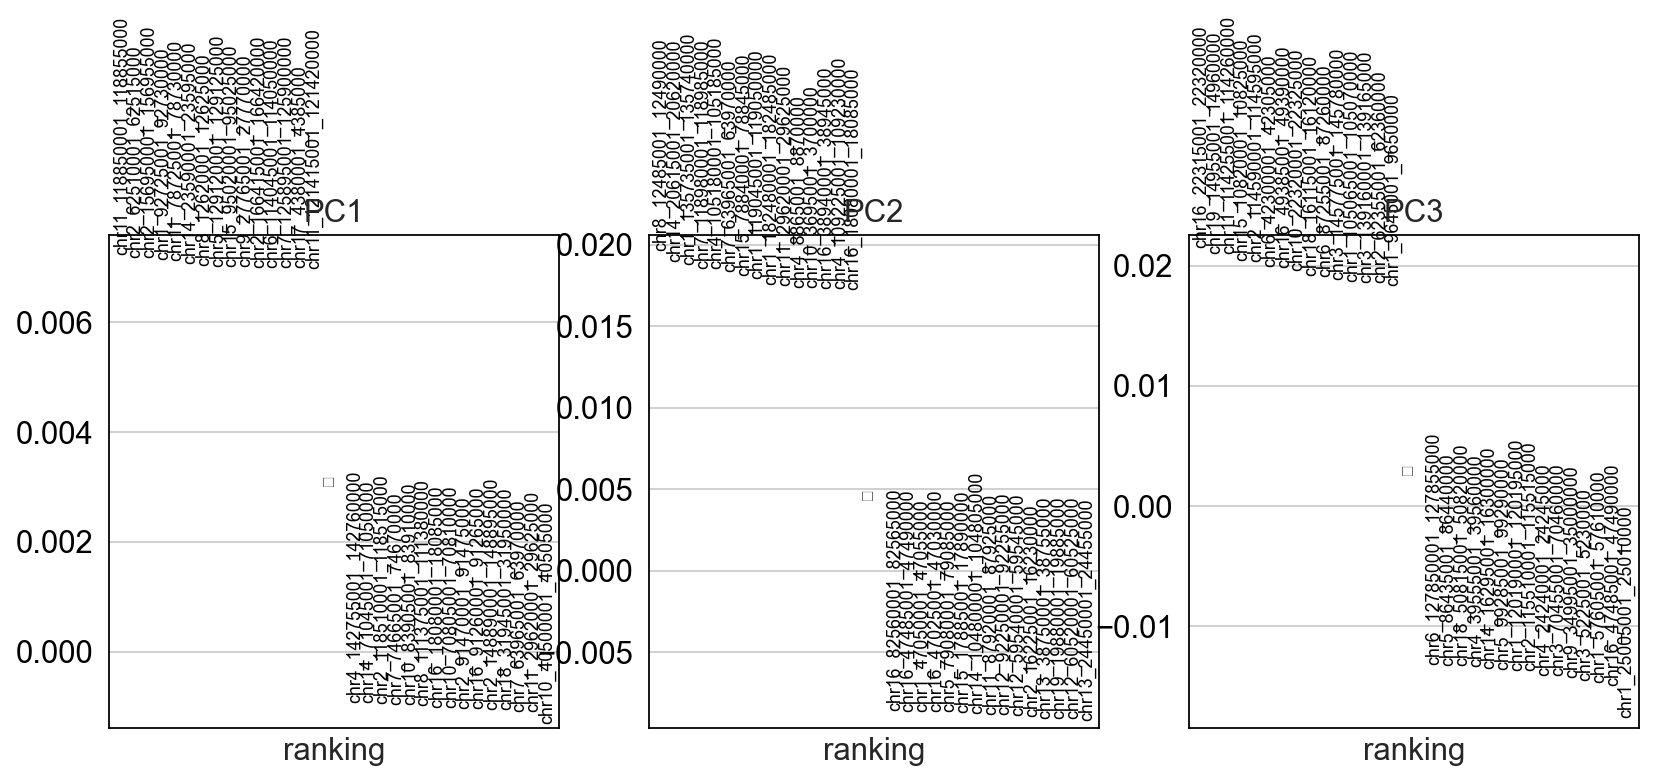

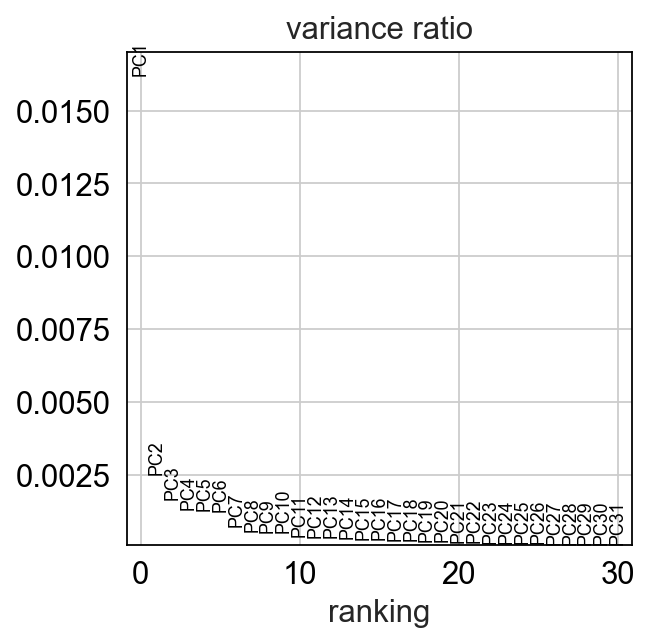

In [120]:
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')
epi.pl.pca_overview(adata, color=['nb_features','cluster'])

In [121]:
epi.pp.lazy(adata)

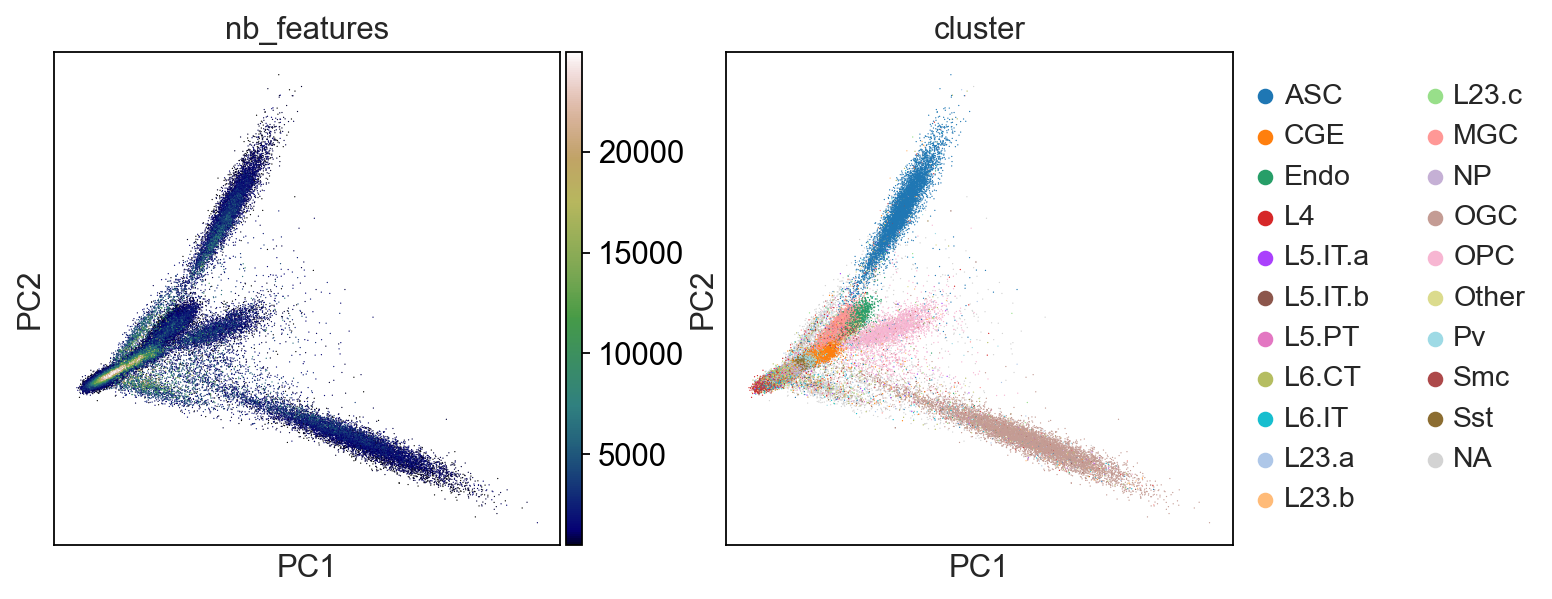

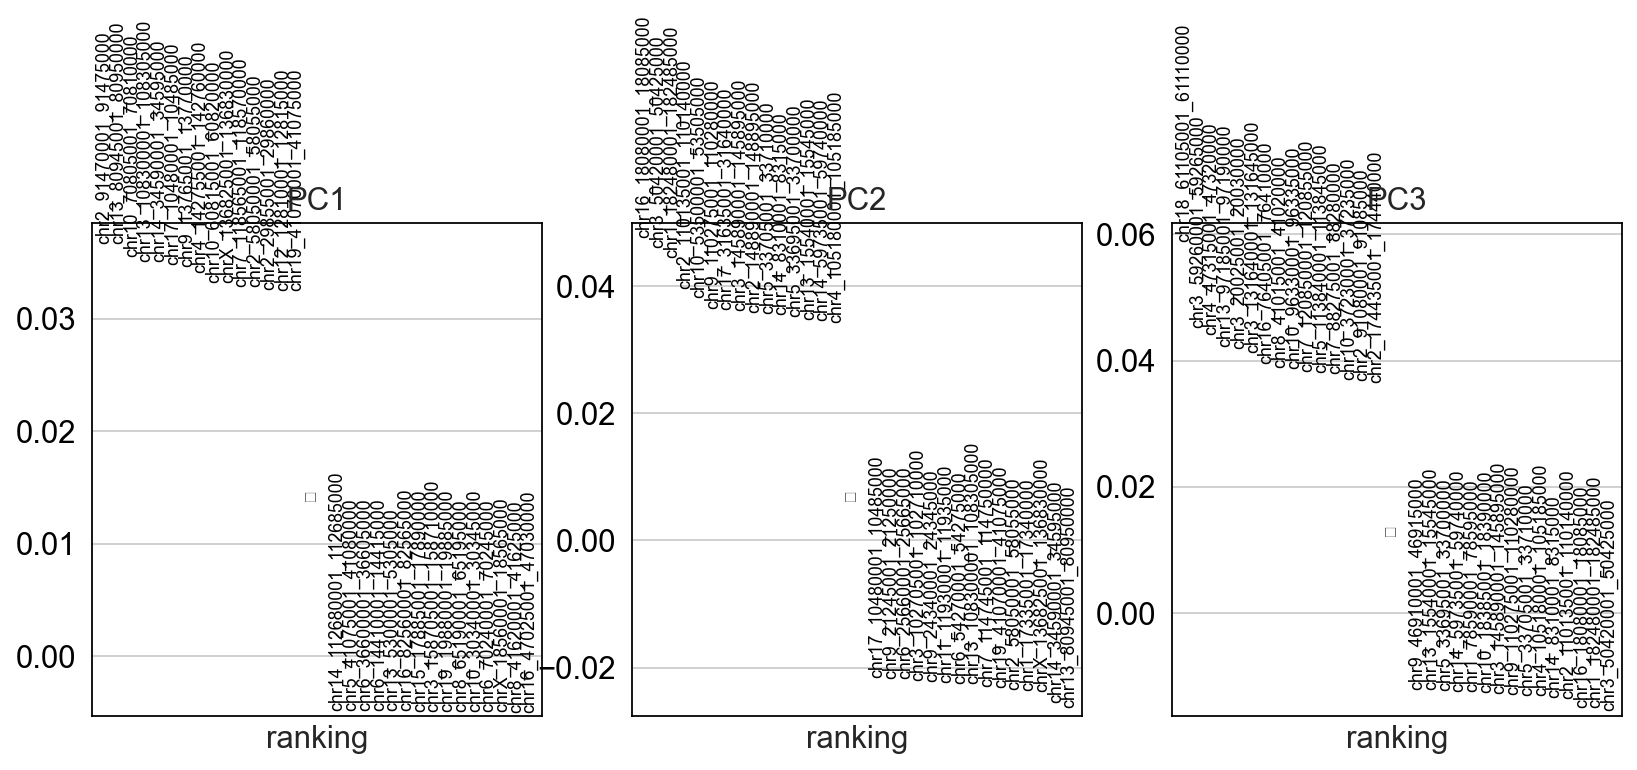

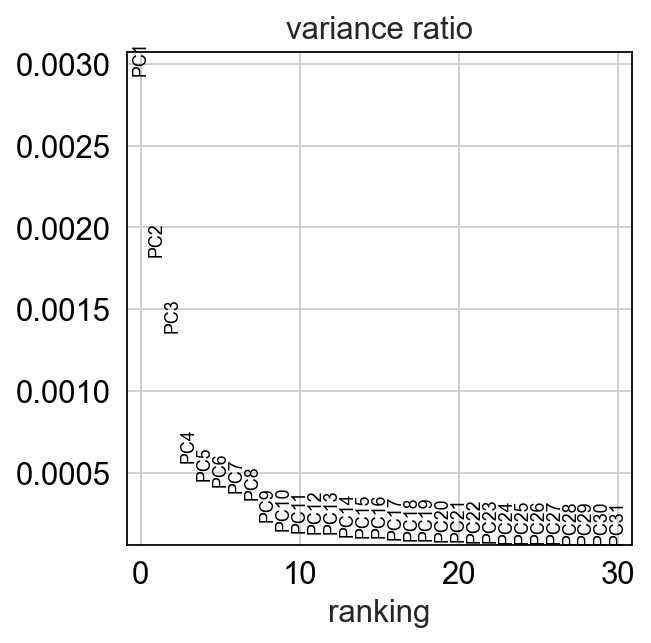

In [122]:
epi.pl.pca_overview(adata, color=['nb_features','cluster'])

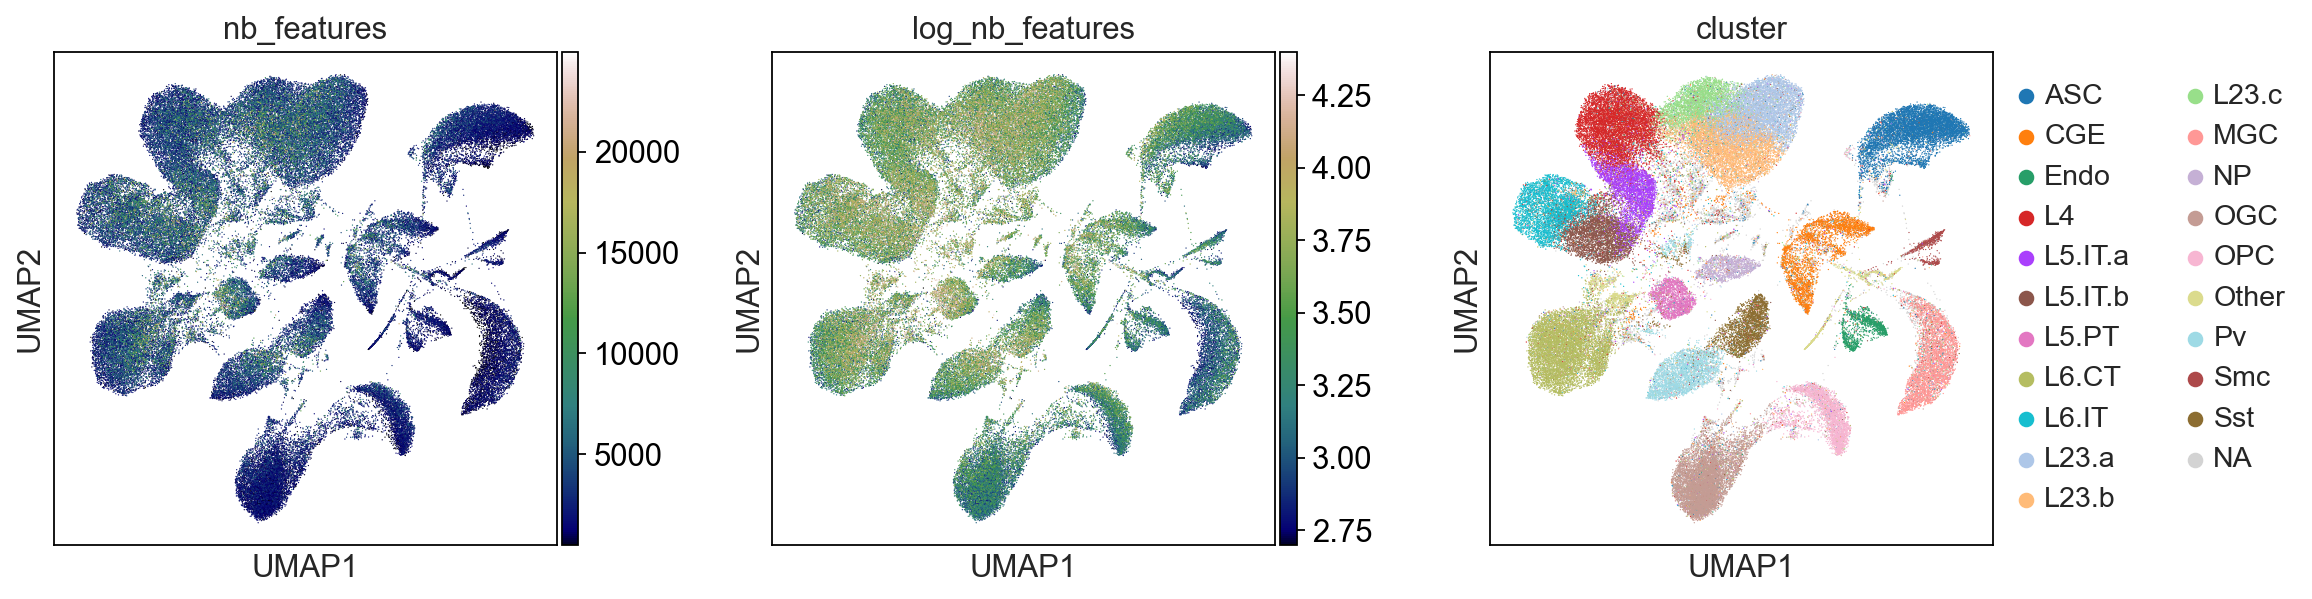

In [123]:
epi.pl.umap(adata, color=['nb_features', 'log_nb_features','cluster'], wspace=0.3)

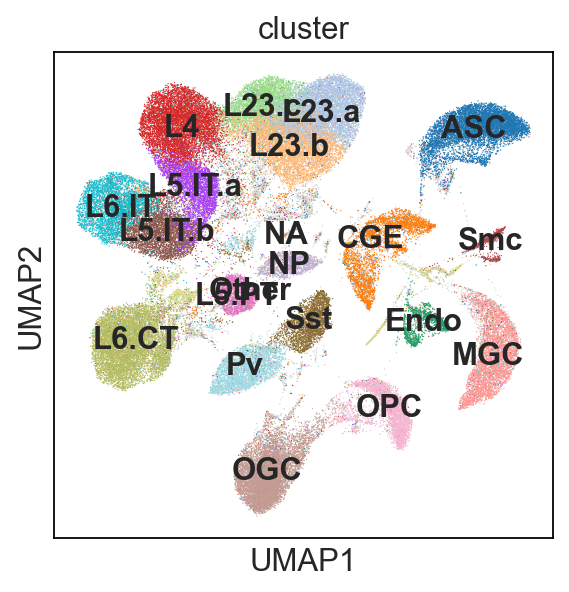

In [125]:
epi.pl.umap(adata, color=['cluster'], wspace=0.3, legend_loc='on data')

In [126]:
# in case the counts vary quite a bit
epi.pp.log1p(adata)

In [127]:
epi.pp.lazy(adata)

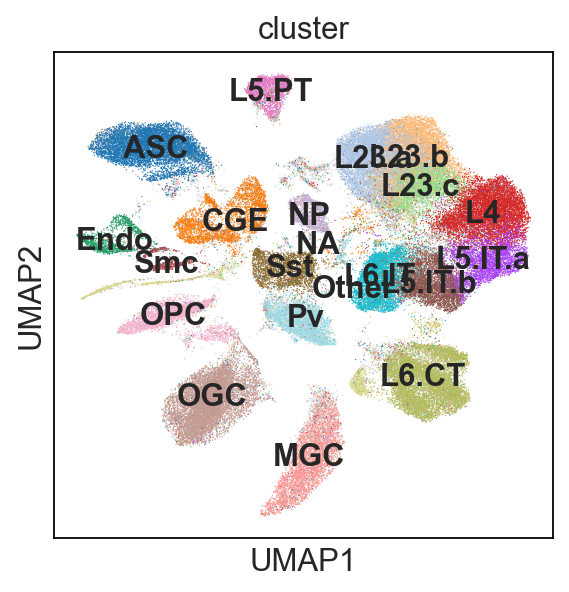

In [128]:
epi.pl.umap(adata, color=['cluster'], wspace=0.3, legend_loc='on data')

### Clustering by leiden

In [129]:
epi.tl.leiden(adata)

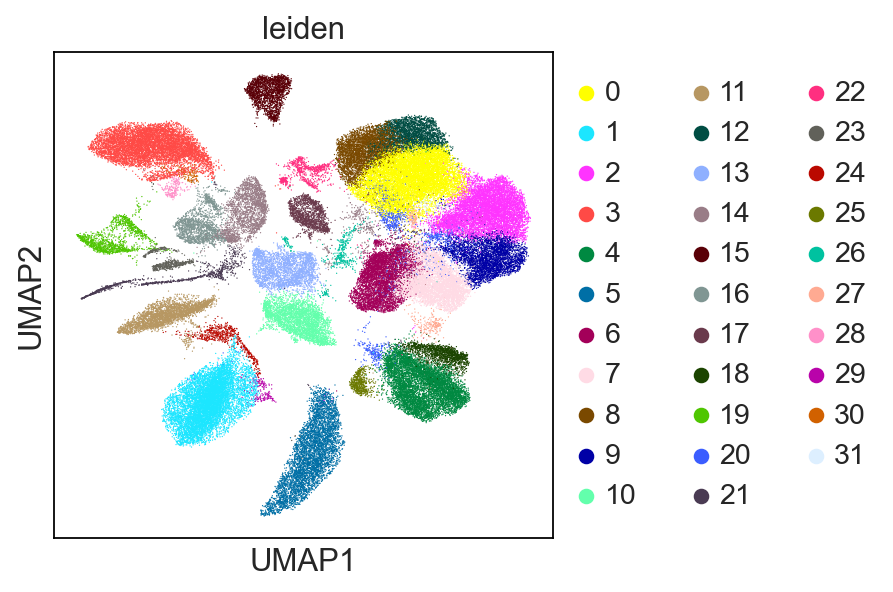

In [130]:
epi.pl.umap(adata, color=['leiden'], wspace=0.4)

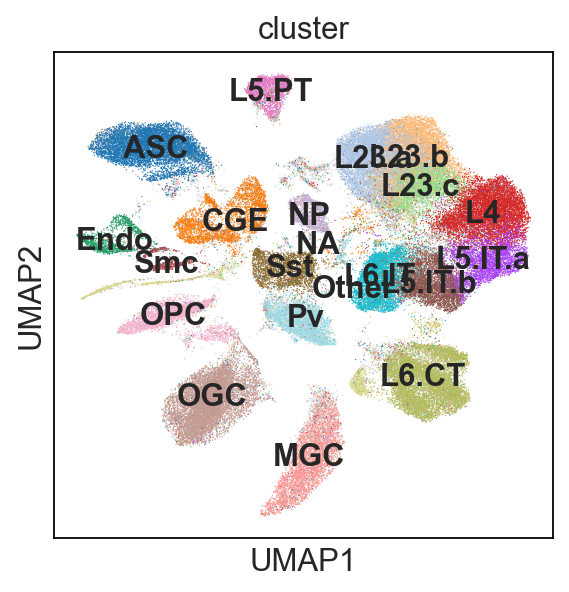

In [131]:
epi.pl.umap(adata, color=['cluster'], wspace=0.3, legend_loc='on data')

In [151]:
adata.obs

barcode        TN        UM        PP  \
2       AGCGATAGAACCAGGTAAGAGATGTATAGCCT  138330.0  128263.0  128039.0   
3       AGCGATAGAACCAGGTAATGACGTCAGGACGT  159133.0  146663.0  146348.0   
4       AGCGATAGAACCAGGTAGGATAACATAGAGGC   19152.0   17586.0   17545.0   
5       AGCGATAGAACCAGGTATAGCCTTAGGCGAAG   14876.0   13837.0   13801.0   
6       AGCGATAGAACCAGGTATAGCCTTATAGAGGC   28532.0   26303.0   26202.0   
...                                  ...       ...       ...       ...   
135645  TCCGGAGATTAGCCTCTATAGCCTGGATACTA    7412.0    6804.0    6764.0   
135657  TCCGGAGATTCCATCCGGTTGCGTGAAGTATG    8403.0    7709.0    7678.0   
135658  TCCGGAGATTCCATCCGGTTGCGTGGTTAGAC   11820.0   10980.0   10928.0   
135661  TCCGGAGATTCCATCCGTACTGACTAAGATCC   11554.0   10475.0   10431.0   
135663  TCCGGAGATTCCATCCTATAGCCTCGAATTCC    9567.0    8636.0    8604.0   

             UQ   CM                                               file  \
2       64868.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
3       69167.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
4        8348.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
5        6583.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
6       12437.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
...         ...  ...                                                ...   
135645   5410.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
135657   6028.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
135658   8736.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
135661   8413.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   
135663   6709.0  0.0  E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...   

        sample  nb_features  log_nb_features leiden  cluster  
2       atac_1        19317         4.488917      2      ASC  
3       atac_1        21895         4.491306      0    L23.b  
4       atac_1         2451         3.609594     11  L5.IT.b  
5       atac_1         2335         3.555094     13    L6.CT  
6       atac_1         5122         3.908646      4    L6.IT  
...        ...          ...              ...    ...      ...  
135645  atac_9         2102         3.447933      7    L23.b  
135657  atac_9         2151         3.507586     10      NaN  
135658  atac_9         3430         3.654080     19    Other  
135661  atac_9         3235         3.648165      5    L23.a  
135663  atac_9         2710         3.569023     13    L6.CT  

[31360 rows x 12 columns]

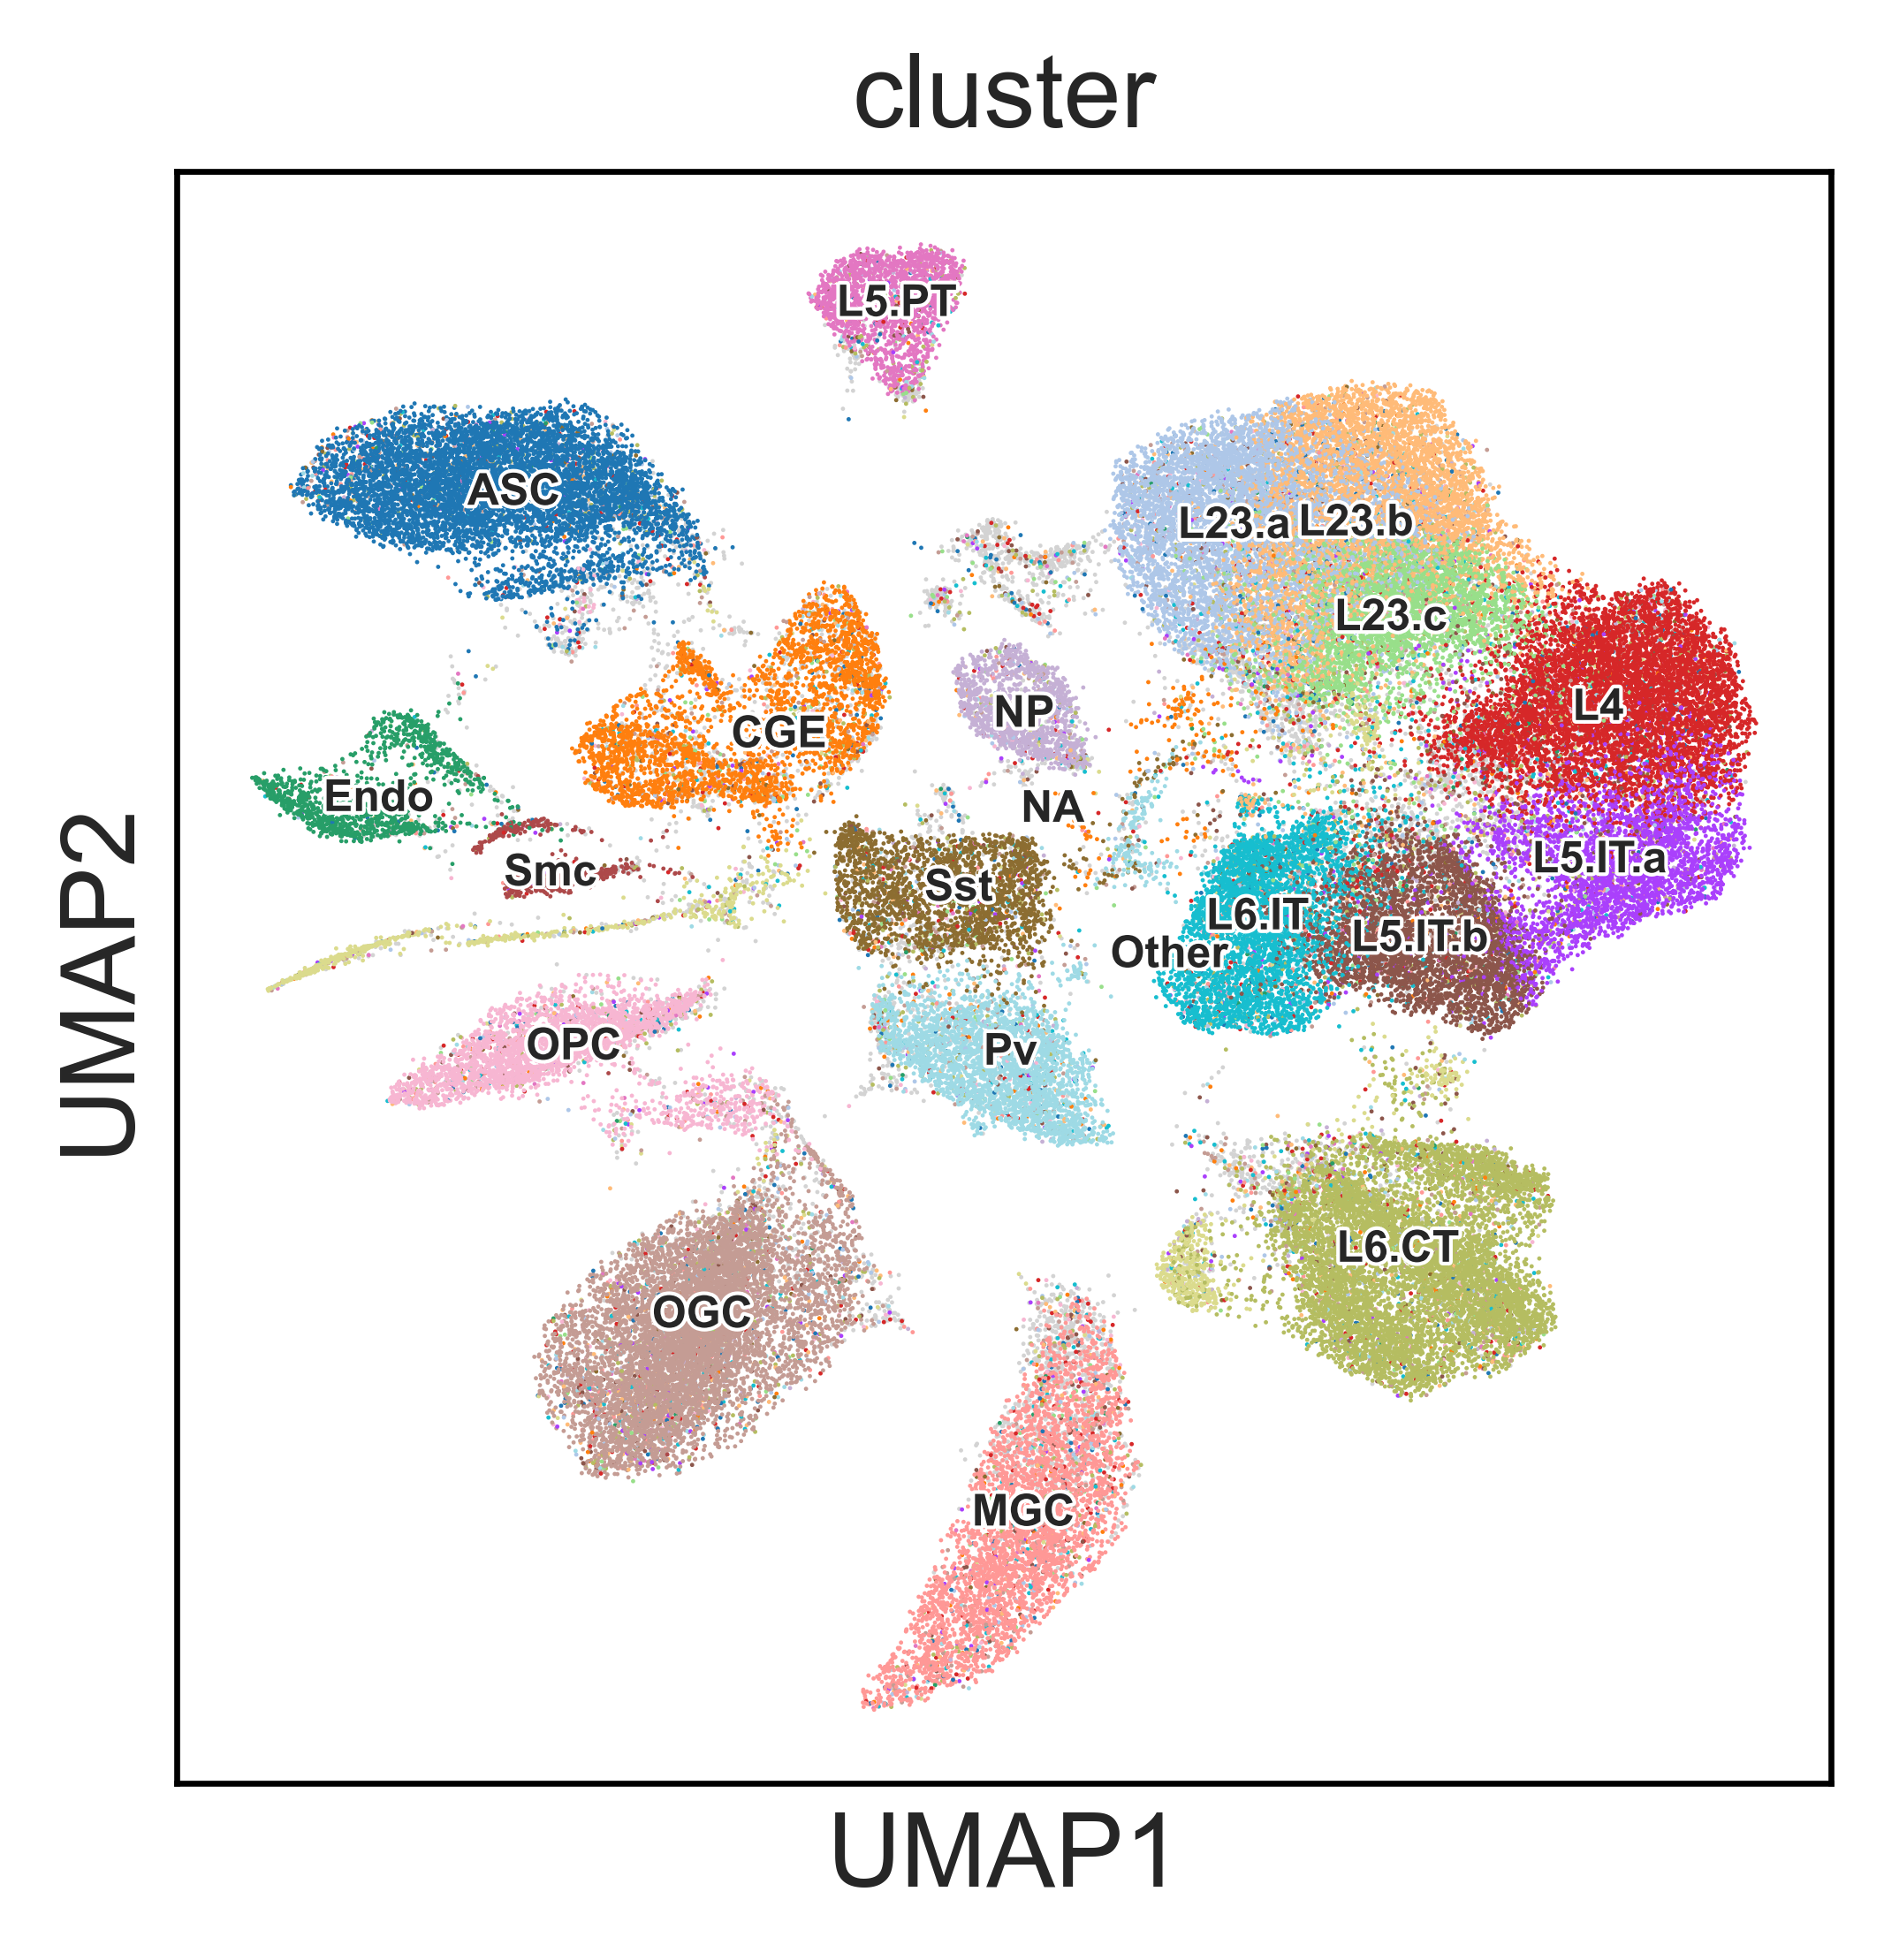

In [132]:
sc.settings.set_figure_params(dpi=300, color_map='gist_earth')
epi.pl.umap(adata, color=['cluster'], legend_loc='on data', legend_fontsize=6,legend_fontoutline=1)

# 5. Save the analyzed Anndata

In [133]:
len(np.unique(adata.var['transcript_annotation']))
len(np.unique(adata.var_names))

450148

In [134]:
data_path

'L:\\Shiwei\\DNA_MERFISH_analysis\\Analysis_MOp_methylation_ATAC\\data\\EckerRen_Mouse_MOp_methylation_ATAC'

In [136]:
adata.write(os.path.join(data_path,'MOp_ATAC_combined_preprocessed.h5ad'))